In [99]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACM\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [100]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACM\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [101]:
pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
         
         * Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse or promote products deri

In [102]:
pip install Flask tensorflow Pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACM\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [103]:
pip install scikit-learn Flask tensorflow Pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACM\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [104]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [105]:
# list the files in the folder
!ls ../input/rock-paper-scissors-dataset/Rock-Paper-Scissors

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [106]:
# list the files in the folder
!ls ../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/test

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [107]:
base_dir = r"C:\Users\ACM\OneDrive\Desktop\rock_paper_scissors\Rock-Paper-Scissors"

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'validation')

paper_dir = os.path.join(train_dir, 'paper')
rock_dir = os.path.join(train_dir, 'rock')
scissors_dir = os.path.join(train_dir, 'scissors')

paper_imgs = os.listdir(paper_dir)
rock_imgs = os.listdir(rock_dir)
scissors_imgs = os.listdir(scissors_dir)

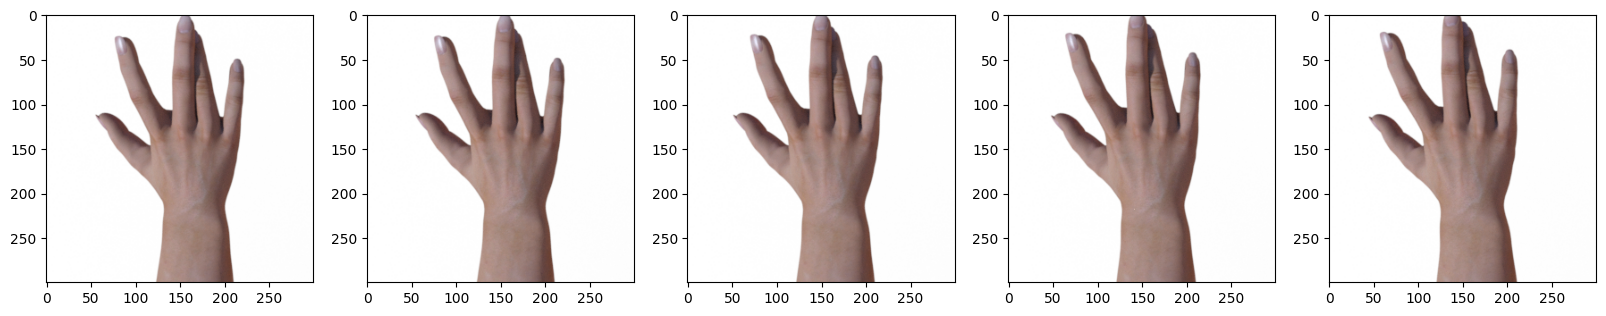

In [108]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(paper_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(paper_dir, img_path))
    plt.imshow(img)
plt.show()

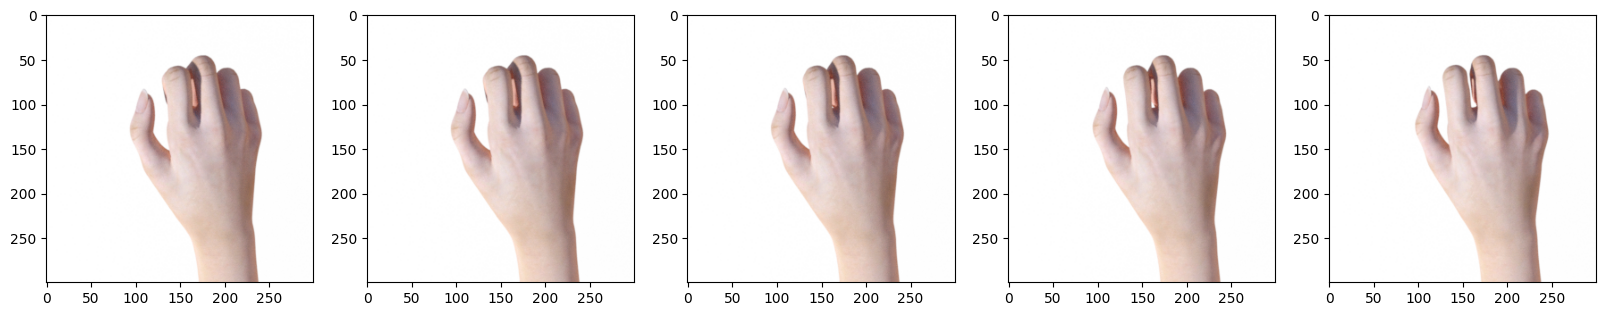

In [109]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(rock_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(rock_dir, img_path))
    plt.imshow(img)
plt.show()

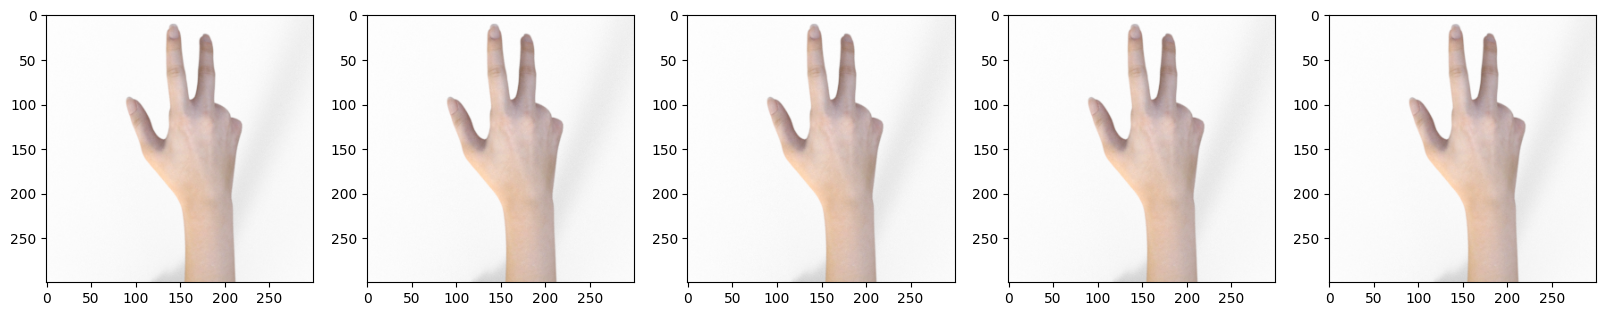

In [110]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(scissors_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(scissors_dir, img_path))
    plt.imshow(img)
plt.show()

In [111]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [112]:
# BATCH_SIZE = 32
# TARGET_SIZE = 64
# EPOCHS = 10

In [113]:
BATCH_SIZE = 32
TARGET_SIZE = 64
EPOCHS = 10

In [114]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                    batch_size=BATCH_SIZE, 
                                                    shuffle=True,
                                                    class_mode='categorical')

val_generator = validation_datagen.flow_from_directory(val_dir,
                                                       target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                       batch_size=BATCH_SIZE, 
                                                       shuffle=True,
                                                       class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [115]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [116]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,363 (653.76 KB)

 Trainable params: 167,363 (653.76 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
# model.fit_generator?

In [119]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.5206 - loss: 0.9380 - val_accuracy: 0.8441 - val_loss: 0.4637
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.9565 - loss: 0.1352 - val_accuracy: 0.8548 - val_loss: 0.3309
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9954 - loss: 0.0269 - val_accuracy: 0.8280 - val_loss: 0.4376
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9971 - loss: 0.0123 - val_accuracy: 0.8441 - val_loss: 0.5070
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accuracy: 0.8091 - val_loss: 0.5216
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.8253 - val_loss: 0.4944
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 1.0000 - loss: 8.0487e-04 - val_accuracy: 0.8253 - val_loss: 0.5418
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy

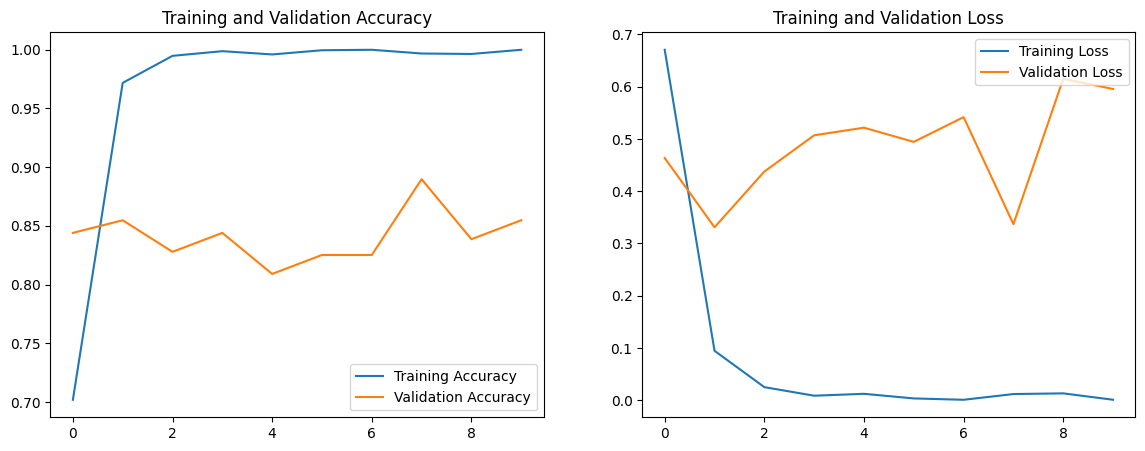

In [120]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

In [121]:
model.save("rock_paper_scissor.keras")

In [122]:
# import pickle

# # Ensure 'model' is your trained Keras model variable

# # --- Code to add to a new cell in your notebook (after fixing the notebook file) ---

# # Save the model using pickle
# model_filename_pkl = 'rock_paper_scissors_model.pkl'
# with open(model_filename_pkl, 'wb') as file:
#     pickle.dump(model, file)
# print(f"Model saved as {model_filename_pkl} using pickle.")

# # To load the model (for your reference):
# # with open(model_filename_pkl, 'rb') as file:
# #     loaded_model_pkl = pickle.load(file)
# # print(f"Model loaded from {model_filename_pkl}")

# print("\n")
# print("IMPORTANT NOTE:")
# print("Saving Keras models with pickle is generally not recommended.")
# print("It can lead to issues with saving/loading the model architecture, weights, and optimizer state.")
# print("Consider using model.save('rock_paper_scissors_model.h5') instead for better reliability.")
# # --- End of code for the new cell ---
